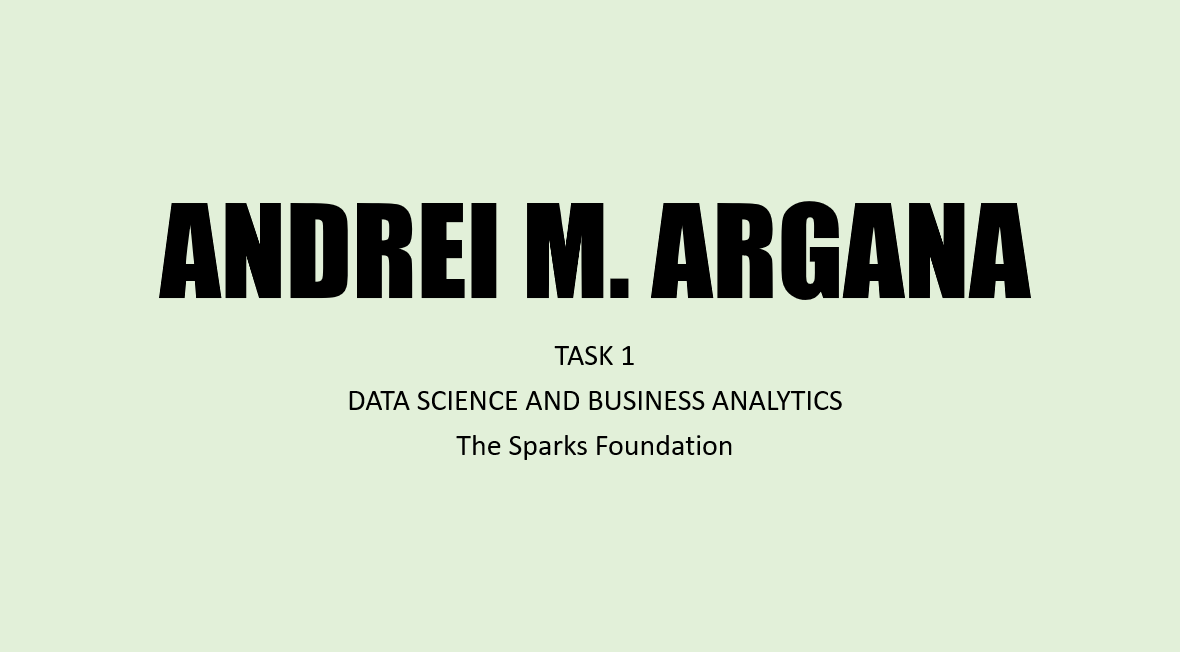

# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Load dataset

In [2]:
dataset="http://bit.ly/w-data"
df=pd.read_csv(dataset)

In [4]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
df.shape

(25, 2)

# Visualize Data

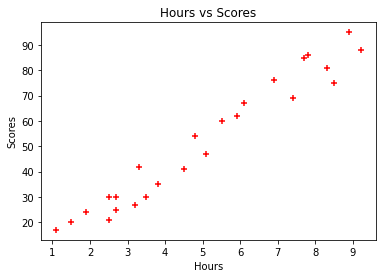

In [8]:
plt.scatter(df.Hours,df.Scores,color="r",marker="+")
plt.title('Hours vs Scores')
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

# Training the Model

### Splitting the data into independent and dependent variables

In [10]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [12]:
regr = LinearRegression().fit(X_train, y_train)
print('model trained')

model trained


In [13]:
print('Intercept    : ', regr.intercept_)
# The coefficients
print('Coefficients : ', regr.coef_[0])

Intercept    :  2.018160041434683
Coefficients :  9.910656480642237


In [14]:
l = regr.coef_*X+regr.intercept_

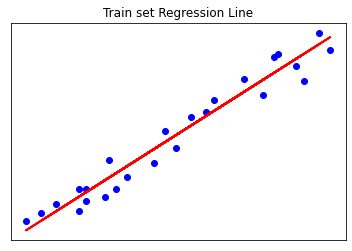

In [15]:
plt.title("Train set Regression Line")
plt.scatter(X, y,  color='blue')
plt.plot(X, l, color='red', linewidth=2)

plt.xticks(())
plt.yticks(())

plt.show()

In [16]:
y_pred = regr.predict(X_test)
predictions = pd.DataFrame({'Hours':X_test.flatten(),'Actual_Score':y_test,'Predicted_Score':y_pred}) 
predictions

,Hours,Actual_Score,Predicted_Score
0,1.5,20,16.884145
1,3.2,27,33.732261
2,7.4,69,75.357018
3,2.5,30,26.794801
4,5.9,62,60.491033


# Evaluation of Model

In [17]:
# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(X_test,y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(X_test, y_pred))
# Mean absolute error: chances of error or wrong forecasting through the model are very less
print('Mean absolute error: ',mean_absolute_error(y_test,y_pred))

Mean squared error: 1871.49
Coefficient of determination: -384.72
Mean absolute error:  4.183859899002975


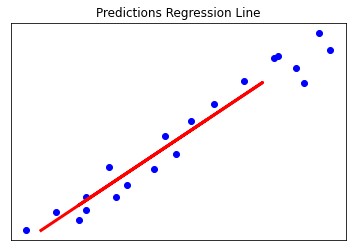

In [18]:
plt.title("Predictions Regression Line")
plt.scatter(X_train, y_train,  color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

# Task Prediction

In [19]:
value = np.array(9.25)
pred = regr.predict(value.reshape(-1,1))
print('If you spend {} hrs/day then you will get your score = {}'.format(value,pred[0]))

If you spend 9.25 hrs/day then you will get your score = 93.69173248737538


# If you spend 9.25 hrs/day then you will get your score = 93.69173248737538